In [1]:
# Data exploration and manipulation
import pandas as pd
import numpy as np
import missingno as msno
from scipy import stats
from statsmodels.formula.api import ols

# Graphics
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# Options
pd.set_option("display.max_columns",200)
%matplotlib inline

# Other librarys
import joblib
import pickle
import sys
from sklearn.pipeline import make_pipeline

# Model related libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# User libraries
sys.path.insert(1, '../../usr_lib/')
import utilities

In [3]:
"""
TODO List
1. Charge data.
2. Preparing data.
    2.1. Exploring data.
    2.2. Clean and explore data.
3. Regression.
    3.1. Feature selection.
    3.2. Model adjustment.
    3.3. Export Pipeline.
4. Classification.
    4.1. Feature selection.
    4.2. Model adjustment
    4.3. Export Pipeline
5. Conclussions.
"""

'\nTODO List\n1. Charge data.\n2. Preparing data.\n    2.1. Exploring data.\n    2.2. Clean and explore data.\n3. Regression.\n    3.1. Feature selection.\n    3.2. Model adjustment.\n    3.3. Export Pipeline.\n4. Classification.\n    4.1. Feature selection.\n    4.2. Model adjustment\n    4.3. Export Pipeline\n5. Conclussions.\n'

In [4]:
data_path = '../../data/modulo2/examen/'

In [5]:
df = pd.read_csv(data_path + 'churn-bigml-80 - churn-bigml-80.csv', sep=',', encoding='utf8')

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# Cálculo del total de totales
df[[x for x in df.columns if 'charge' in x]]

,Total day charge,Total eve charge,Total night charge,Total intl charge
0,45.07,16.78,11.01,2.70
1,27.47,16.62,11.45,3.70
2,41.38,10.30,7.32,3.29
3,50.90,5.26,8.86,1.78
4,28.34,12.61,8.41,2.73
...,...,...,...,...
2661,22.90,16.12,9.96,3.19
2662,26.55,18.32,12.56,2.67
2663,39.29,13.04,8.61,2.59
2664,30.74,24.55,8.64,3.81


In [8]:
l = [x for x in df.columns if 'charge' in x]
df['grand_total'] = df[l[0]]
for i in l[1:]:
    df['grand_total'] += df[i] 

In [9]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,grand_total
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [10]:
vars_c = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge',  'Customer service calls', 'grand_total']
vars_v = ['International plan', 'Voice mail plan', 'Churn']
vars_g = ['State', 'Area code']

df = utilities.rename_variables(df, vars_c, 'c_')
df = utilities.rename_variables(df, vars_v, 'v_')
df = utilities.rename_variables(df, vars_g, 'g_')

In [11]:
df.head()

,g_state,c_account length,g_area code,v_international plan,v_voice mail plan,c_number vmail messages,c_total day minutes,c_total day calls,c_total day charge,c_total eve minutes,c_total eve calls,c_total eve charge,c_total night minutes,c_total night calls,c_total night charge,c_total intl minutes,c_total intl calls,c_total intl charge,c_customer service calls,v_churn,c_grand_total
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
var = list(df.columns[5:-2])

st = StandardScaler()
st_r = pd.DataFrame(st.fit_transform(df[var]), columns = var)

mms = MinMaxScaler()
mms_r = pd.DataFrame(mms.fit_transform(df[var]), columns = var)


In [14]:
st_r.head()

,c_number vmail messages,c_total day minutes,c_total day calls,c_total day charge,c_total eve minutes,c_total eve calls,c_total eve charge,c_total night minutes,c_total night calls,c_total night charge,c_total intl minutes,c_total intl calls,c_total intl charge,c_customer service calls
0,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172
1,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172
2,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955
3,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610
4,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392


In [15]:
mms_r.head()

,c_number vmail messages,c_total day minutes,c_total day calls,c_total day charge,c_total eve minutes,c_total eve calls,c_total eve charge,c_total night minutes,c_total night calls,c_total night charge,c_total intl minutes,c_total intl calls,c_total intl charge,c_customer service calls
0,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,0.436090,0.572152,0.500,0.15,0.500000,0.111111
1,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,0.526316,0.600000,0.685,0.15,0.685185,0.111111
2,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,0.533835,0.338608,0.610,0.25,0.609259,0.000000
3,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,0.421053,0.436076,0.330,0.35,0.329630,0.222222
4,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,0.661654,0.407595,0.505,0.15,0.505556,0.333333


In [16]:
# Definición del espacio X, y
X_st = st_r[[x for x in var if 'charge' not in x]]
X_mms = mms_r[[x for x in var if 'charge' not in x]]
y = df['c_grand_total']

In [29]:
# Regresión
from sklearn.linear_model import LinearRegression, Lars, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge

lr = LinearRegression()
lars = Lars()
rg = Ridge()
lasso = Lasso(alpha=0.5)
en = ElasticNet()
sdg = SGDRegressor()
bay = BayesianRidge()
lda = LinearDiscriminantAnalysis()
krg = KernelRidge()

In [25]:
def ajusta_modelo_lineal(df, X, y, tgt='tgt', modelo=None):
    ajuste = modelo.fit(X, y)
    predicted = ajuste.predict(X)
    print('*'*100)
    print(f'{modelo}')
    print('*'*100)
    print('Estadísticos de interés')
    print('*'*100)
    print(f'El modelo tiene un error aboluto medio de: {mean_absolute_error(y, predicted)}')
    print(f'El modelo tiene un error cuadrático medio de: {mean_squared_error(y, predicted)}')
    print('*'*100)
    print('Coeficientes:')
    for i in range(len(list(modelo.coef_))):
        print(f'Beta{i} = {list(modelo.coef_)[i]}')
    df[f'predicted_by_{modelo}'] = modelo.predict(X)
    df[f'error_{modelo}'] = df[tgt] -  df[f'predicted_by_{modelo}']
    fig = px.histogram(df, x=f'error_{modelo}', marginal='box')
    fig.show()
    for i in list(X.columns):
        sm.qqplot(df[i], line ='45')
    return df

****************************************************************************************************
LinearRegression()
****************************************************************************************************
Estadísticos de interés
****************************************************************************************************
El modelo tiene un error aboluto medio de: 0.004567561638890057
El modelo tiene un error cuadrático medio de: 3.199382009520181e-05
****************************************************************************************************
Coeficientes:
Beta0 = 7.725844421256277e-05
Beta1 = 9.213987847595773
Beta2 = 9.136815757493366e-05
Beta3 = 4.3300351925962905
Beta4 = 0.00011034486930583398
Beta5 = 2.284737005520127
Beta6 = 5.398609966889012e-05
Beta7 = 0.7525695744026476
Beta8 = 0.00011281896351267306
Beta9 = -6.146158437836391e-05


/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). 

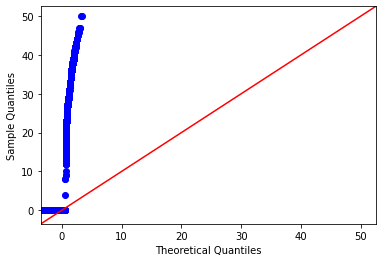

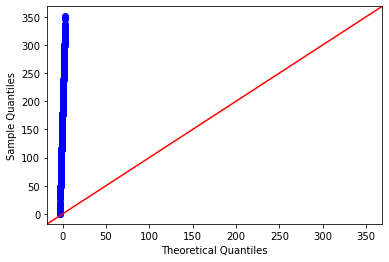

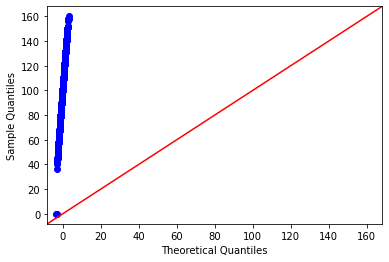

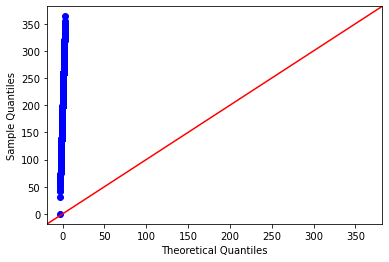

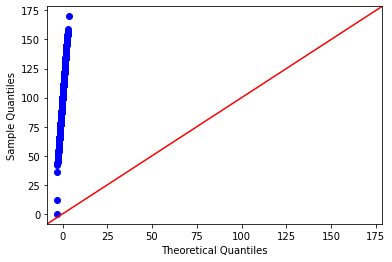

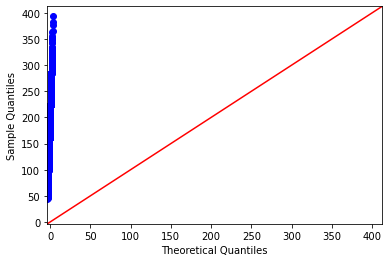

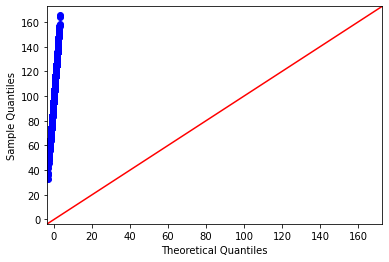

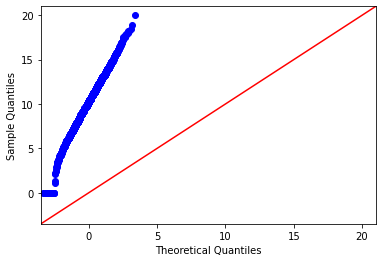

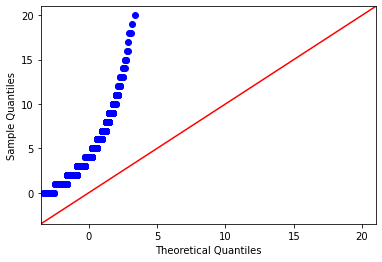

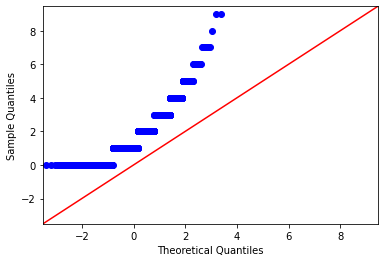

In [26]:
df_r = ajusta_modelo_lineal(df, X_st, y, tgt='c_grand_total', modelo=lr)

****************************************************************************************************
Lars()
****************************************************************************************************
Estadísticos de interés
****************************************************************************************************
El modelo tiene un error aboluto medio de: 0.004567561638890061
El modelo tiene un error cuadrático medio de: 3.199382009520237e-05
****************************************************************************************************
Coeficientes:
Beta0 = 7.725844420891078e-05
Beta1 = 9.21398784759576
Beta2 = 9.136815756994212e-05
Beta3 = 4.330035192596293
Beta4 = 0.00011034486929907611
Beta5 = 2.284737005520124
Beta6 = 5.3986099666617395e-05
Beta7 = 0.7525695744026496
Beta8 = 0.00011281896350944239
Beta9 = -6.14615843788594e-05


/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). 

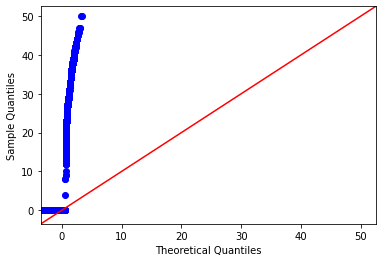

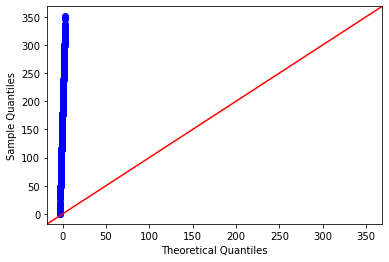

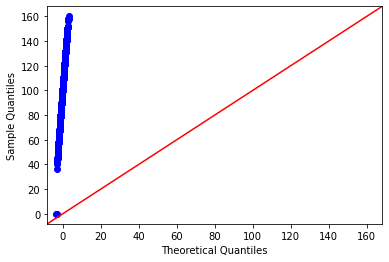

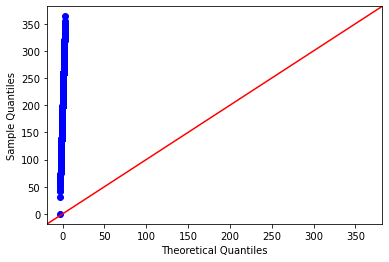

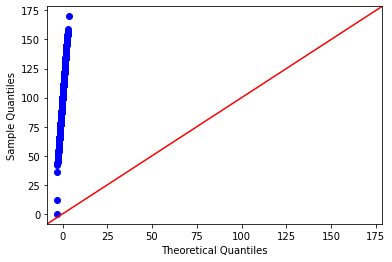

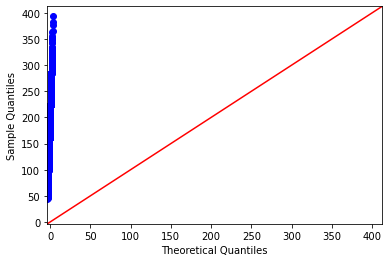

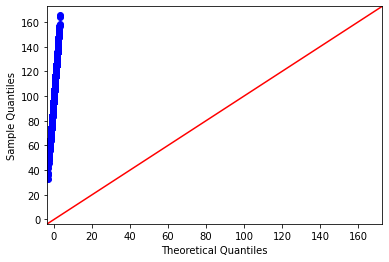

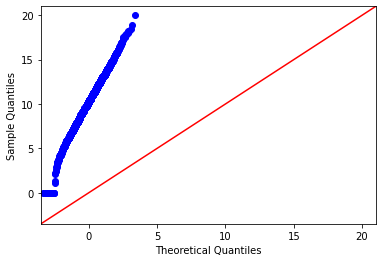

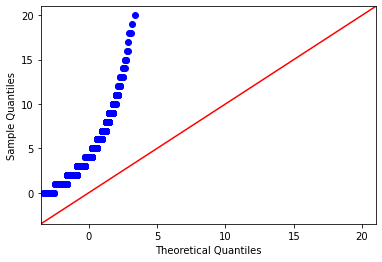

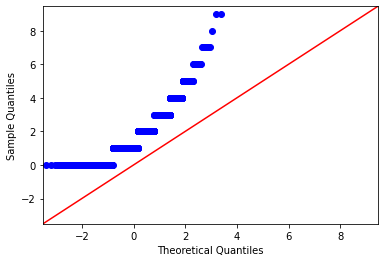

In [27]:
df_r = ajusta_modelo_lineal(df, X_st, y, tgt='c_grand_total', modelo=lars)

****************************************************************************************************
Lasso(alpha=0.5)
****************************************************************************************************
Estadísticos de interés
****************************************************************************************************
El modelo tiene un error aboluto medio de: 0.8042650833885243
El modelo tiene un error cuadrático medio de: 1.0115509556454207
****************************************************************************************************
Coeficientes:
Beta0 = 0.0
Beta1 = 8.71716600772805
Beta2 = 0.0
Beta3 = 3.8217035998373103
Beta4 = 0.0
Beta5 = 1.7802033266981714
Beta6 = 0.0
Beta7 = 0.2392328449949084
Beta8 = 0.0
Beta9 = -0.0


/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). 

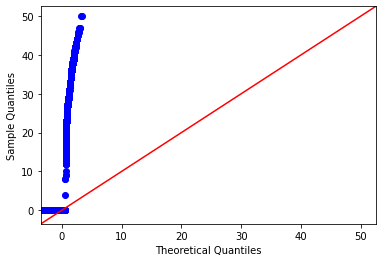

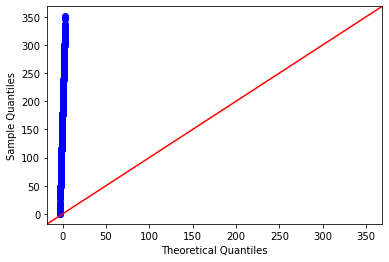

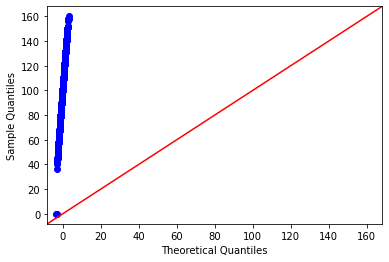

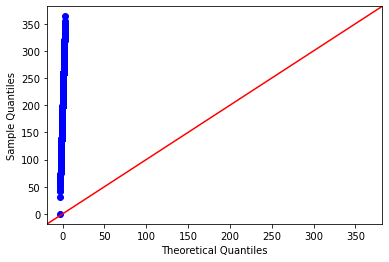

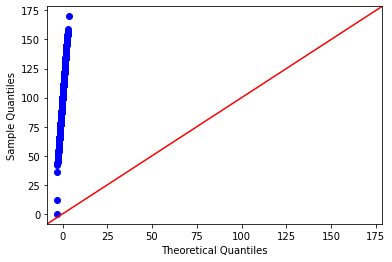

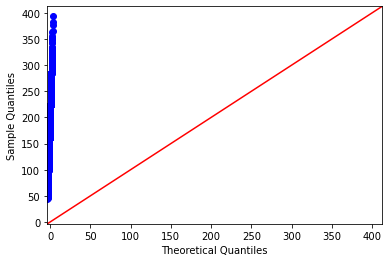

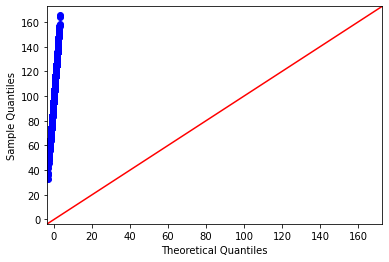

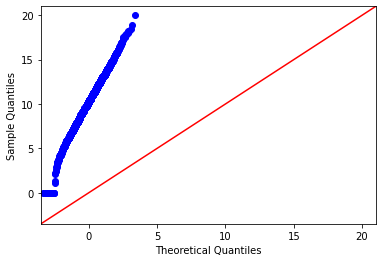

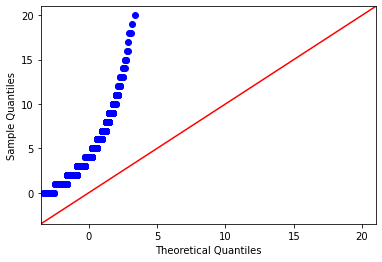

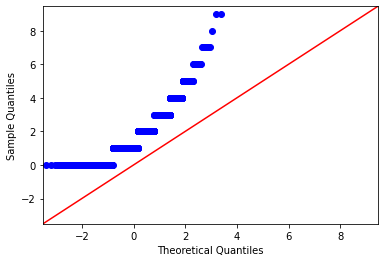

In [30]:
df_r = ajusta_modelo_lineal(df, X_st, y, tgt='c_grand_total', modelo=lasso)

****************************************************************************************************
BayesianRidge()
****************************************************************************************************
Estadísticos de interés
****************************************************************************************************
El modelo tiene un error aboluto medio de: 0.004567561931845044
El modelo tiene un error cuadrático medio de: 3.1993820095335266e-05
****************************************************************************************************
Coeficientes:
Beta0 = 7.725867758390237e-05
Beta1 = 9.213987837477026
Beta2 = 9.136825726896447e-05
Beta3 = 4.330035187825134
Beta4 = 0.00011034493286507518
Beta5 = 2.2847370030673275
Beta6 = 5.398629926045562e-05
Beta7 = 0.7525695734062772
Beta8 = 0.00011281904811799581
Beta9 = -6.146187706154715e-05


/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

/home/sqpr14_/anaconda3/envs/dss/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). 

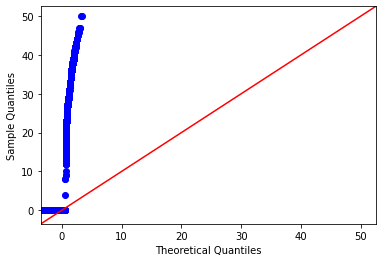

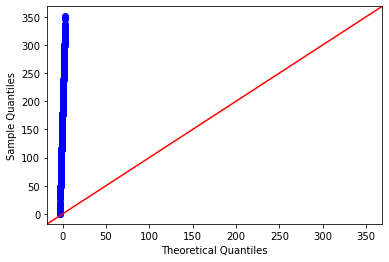

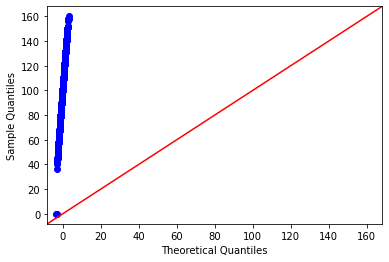

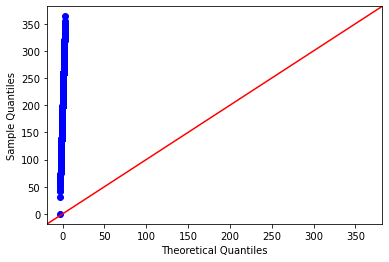

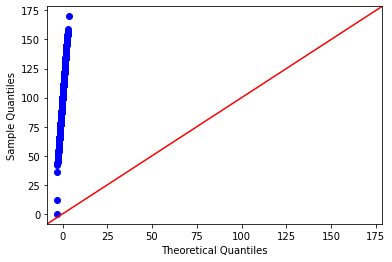

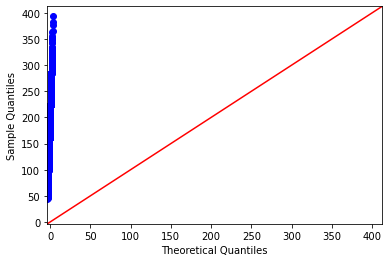

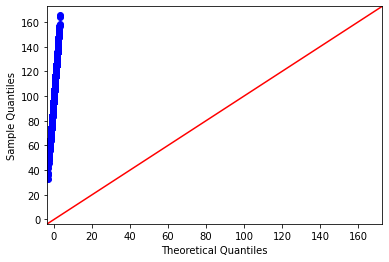

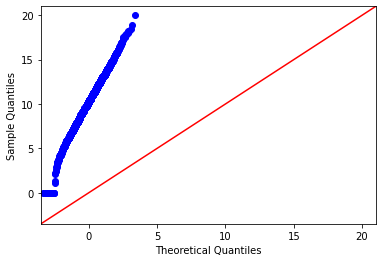

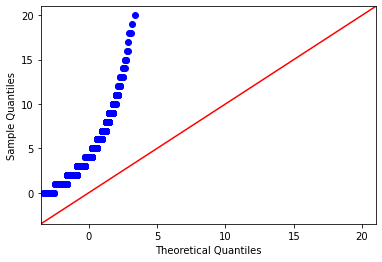

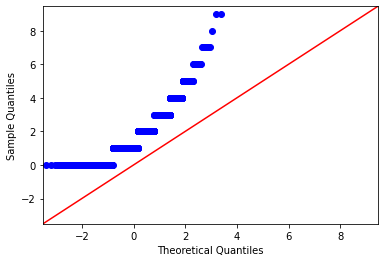

In [31]:
df_r = ajusta_modelo_lineal(df, X_st, y, tgt='c_grand_total', modelo=bay)

In [34]:
from joblib import dump


pr = bay.fit(X_st, y)
dump(pr, 'pipeline_regresion_AIPL.joblib')

['pipeline_regresion_AIPL.joblib']

In [35]:
from joblib import load
model = load('pipeline_regresion_AIPL.joblib')

In [37]:
model.predict(X_st)

array([75.55891676, 59.23794022, 62.29239664, ..., 63.52735377,
       67.72738387, 77.01268014])